In [ ]:
import pandas as pd

In [ ]:
#reading the dataset
df = pd.read_csv('readmission.csv')

<ipython-input-2-a1e980a2d476>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('readmission.csv')


In [ ]:
df.shape

(101766, 49)

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
cols = df.columns
drop_cols = []

In [ ]:
#identifying the columns with more than 50 percent missing values
for col in cols:
    if float(df[col].isna().sum())/df.shape[0]>0.5:
        drop_cols.append(col)

In [ ]:
drop_cols

['weight', 'max_glu_serum', 'A1Cresult']

In [ ]:
df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [ ]:
df.isna().sum()

,0
race,2273
gender,0
age,0
weight,98569
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
payer_code,40256
medical_specialty,49949


In [ ]:
"""Checking the Relation between payer_code and target column.
We are doing this because payer_code has 40 percent missing values
so we are checking weather non missing categories are having any relation with target variable"""

df.groupby(['payer_code','readmitted'])['readmitted'].count()

payer_code  readmitted
BC          <30             426
            >30            1301
            NO             2928
CH          <30              13
            >30              33
            NO              100
CM          <30             198
            >30             661
            NO             1078
CP          <30             214
            >30             781
            NO             1538
DM          <30              64
            >30             220
            NO              265
FR          NO                1
HM          <30             644
            >30            2320
            NO             3310
MC          <30            3810
            >30           11982
            NO            16647
MD          <30             416
            >30            1259
            NO             1857
MP          <30               9
            >30              39
            NO               31
OG          <30             136
            >30             333
            NO              564
OT          <30               7
            >30              38
            NO               50
PO          <30              44
            >30             144
            NO              404
SI          <30               7
            >30              17
            NO               31
SP          <30             510
            >30            1869
            NO             2628
UN          <30             227
            >30             696
            NO             1525
WC          <30               5
            >30              24
            NO              106
Name: readmitted, dtype: int64

In [ ]:
#as it is having no relation we are adding it to drop cols
drop_cols.append('payer_code')

In [ ]:
#Checked the same for medical_specialty column as it is having 49% missing values and found there is a relation with target variable
ms=df.groupby(['medical_specialty','readmitted'])['readmitted'].count().sort_values(ascending=False)
ms[ms>100]

medical_specialty                  readmitted
InternalMedicine                   NO            8266
                                   >30           4723
Family/GeneralPractice             NO            3894
Emergency/Trauma                   NO            3713
Cardiology                         NO            3074
Emergency/Trauma                   >30           3006
Family/GeneralPractice             >30           2663
Cardiology                         >30           1853
Surgery-General                    NO            1711
InternalMedicine                   <30           1646
Surgery-General                    >30           1046
Orthopedics                        NO             922
Family/GeneralPractice             <30            883
Orthopedics-Reconstructive         NO             848
Emergency/Trauma                   <30            846
Nephrology                         NO             699
                                   >30            666
Radiologist                        NO             654
ObstetricsandGynecology            NO             529
Psychiatry                         NO             488
Surgery-Cardiovascular/Thoracic    NO             479
Pulmonology                        NO             447
Urology                            NO             432
Cardiology                         <30            425
Radiologist                        >30            383
Surgery-Neuro                      NO             360
Surgery-General                    <30            342
Pulmonology                        >30            328
Orthopedics                        >30            327
Orthopedics-Reconstructive         >30            293
Gastroenterology                   NO             288
Psychiatry                         >30            262
Surgery-Vascular                   NO             259
Nephrology                         <30            248
PhysicalMedicineandRehabilitation  NO             237
Gastroenterology                   >30            214
Surgery-Vascular                   >30            200
Urology                            >30            185
Oncology                           NO             182
Pediatrics                         NO             159
Orthopedics                        <30            151
Neurology                          NO             145
Pediatrics-Endocrinology           NO             135
Surgery-Cardiovascular/Thoracic    >30            130
ObstetricsandGynecology            >30            110
Psychiatry                         <30            104
Hematology/Oncology                NO             103
Radiologist                        <30            103
Name: readmitted, dtype: int64

In [ ]:
med_cat=df['medical_specialty'].value_counts().reset_index()
med_cat.columns = ['medical_specialty', 'count']


In [ ]:
med_catlist=med_cat[med_cat['count']>100]['medical_specialty'].tolist()

In [ ]:
#created new column by mapping infrequent categories with others
df['medical_specialty_new']=df['medical_specialty'].apply(lambda x: x if x in med_catlist else 'other')

In [ ]:
drop_cols.append('medical_specialty')

In [ ]:
df=df.drop(columns=drop_cols)

In [ ]:
df.isna().sum()

,0
race,2273
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [ ]:
cols=df.columns

In [ ]:
num_cols=[]
for col in cols:
    if df[col].dtype in ('float64','int64'):
        num_cols.append(col)
cat_cols=[]
for col in cols:
    if df[col].dtype=='object':
        cat_cols.append(col)

In [ ]:
#replaced missing values in category cols with mode
for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

In [ ]:
#replaced missing values in numerical cols with mean
for col  in num_cols:
    df[col]=df[col].fillna(df[col].mean())

In [ ]:
#Identifying Highly Cardinal Cols
more_cat_cols=[]
for col in cat_cols:
    if df[col].nunique()>30:
        more_cat_cols.append(col)

In [ ]:
more_cat_cols

['diag_1', 'diag_2', 'diag_3']

In [ ]:
df.isna().sum()

,0
race,0
gender,0
age,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [ ]:
#checking if there is a relation between highly cardinal cols and target col
rm_cols=[]
for col in more_cat_cols:
    more_col_check=df.groupby([col,'readmitted'])['readmitted'].count().sort_values(ascending=False).reset_index(name='count')
    if more_col_check['readmitted'].value_counts().sum()>1.4*df[col].value_counts().count():
        rm_cols.append(col)

In [ ]:
df = df.drop(columns=rm_cols)
cols=df.columns

In [ ]:
num_cols=[]
for col in cols:
    if df[col].dtype in ('float64','int64'):
        num_cols.append(col)
cat_cols=[]
for col in cols:
    if df[col].dtype=='object':
        cat_cols.append(col)

In [ ]:
for col in cat_cols:
    print(col,':',df[col].nunique())

race : 5
gender : 3
age : 10
metformin : 4
repaglinide : 4
nateglinide : 4
chlorpropamide : 4
glimepiride : 4
acetohexamide : 2
glipizide : 4
glyburide : 4
tolbutamide : 2
pioglitazone : 4
rosiglitazone : 4
acarbose : 4
miglitol : 4
troglitazone : 2
tolazamide : 3
examide : 1
citoglipton : 1
insulin : 4
glyburide-metformin : 4
glipizide-metformin : 2
glimepiride-pioglitazone : 2
metformin-rosiglitazone : 2
metformin-pioglitazone : 2
change : 2
diabetesMed : 2
readmitted : 3
medical_specialty_new : 28


In [ ]:
df.shape

(101766, 41)

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# # Example DataFrame
# data = {'Feature1': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
#         'Feature2': ['X', 'Y', 'X', 'Z', 'Y', 'X', 'Z']}
# df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['race'], df['readmitted'])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")


Chi-Square Statistic: 81.9352284027111
P-Value: 1.992203257194231e-14


In [ ]:
#Implemented Chi square test for feature selection
from scipy.stats import chi2_contingency

def chi_square_feature_selection(df, target, significance_level=0.05):
    chi2_scores = {}
    for col in df.select_dtypes(include=['object', 'category']).columns:
        if col == target:
            continue
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi2_scores[col] = p  # Store p-value

    # Sort features by p-value (lower is better)
    best_features = {col: p for col, p in chi2_scores.items() if p < significance_level}
    return sorted(best_features.items(), key=lambda x: x[1])

# Example usage
# df = pd.DataFrame({
#     'Feature1': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
#     'Feature2': ['X', 'Y', 'X', 'Z', 'Y', 'X', 'Z'],
#     'Target': ['Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes']
# })

best_features = chi_square_feature_selection(df, target='readmitted')
print("Features ranked by Chi-Square Test p-value:", best_features)
cat_features = [feature for feature, _ in best_features]

Features ranked by Chi-Square Test p-value: [('medical_specialty_new', 2.153061168748518e-208), ('insulin', 2.1265863574275524e-108), ('diabetesMed', 1.175514151065395e-84), ('age', 9.348415309480624e-56), ('change', 1.3620608235566452e-47), ('metformin', 2.4459172244508684e-20), ('race', 1.992203257194231e-14), ('repaglinide', 7.302647338261783e-11), ('glipizide', 6.551146454565371e-10), ('rosiglitazone', 1.1618725247673879e-07), ('gender', 1.447272318868805e-07), ('acarbose', 3.17561437847745e-06), ('pioglitazone', 4.042849784838779e-05), ('glimepiride', 0.010640757837452677)]


In [ ]:
final_cols=num_cols+cat_features
final_cols.append('readmitted')

In [ ]:
findf = df[final_cols]

In [ ]:
findf.shape

(101766, 26)

In [ ]:
print(len(num_cols), len(cat_features))

11 14


In [ ]:
findf.head()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,metformin,race,repaglinide,glipizide,rosiglitazone,gender,acarbose,pioglitazone,glimepiride,readmitted
0,6,25,1,1,41,0,1,0,0,0,...,No,Caucasian,No,No,No,Female,No,No,No,NO
1,1,1,7,3,59,0,18,0,0,0,...,No,Caucasian,No,No,No,Female,No,No,No,>30
2,1,1,7,2,11,5,13,2,0,1,...,No,AfricanAmerican,No,Steady,No,Female,No,No,No,NO
3,1,1,7,2,44,1,16,0,0,0,...,No,Caucasian,No,No,No,Male,No,No,No,NO
4,1,1,7,1,51,0,8,0,0,0,...,No,Caucasian,No,Steady,No,Male,No,No,No,NO


In [ ]:
num_df = findf[num_cols]

In [ ]:
#checked correlation between numerical features
num_df.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,0.026511,-0.019116,-0.038161,-0.117126
discharge_disposition_id,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,-0.008715,-0.024471,0.020787,0.046891
admission_source_id,0.106654,0.018193,1.000000,-0.006965,0.048885,-0.135400,-0.054533,0.027244,0.059892,0.036314,0.072114
time_in_hospital,-0.012500,0.162748,-0.006965,1.000000,0.318450,0.191472,0.466135,-0.008916,-0.009681,0.073623,0.220186
num_lab_procedures,-0.143713,0.023415,0.048885,0.318450,1.000000,0.058066,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_procedures,0.129888,0.015921,-0.135400,0.191472,0.058066,1.000000,0.385767,-0.024819,-0.038179,-0.066236,0.073734
num_medications,0.079535,0.108753,-0.054533,0.466135,0.268161,0.385767,1.000000,0.045197,0.013180,0.064194,0.261526
number_outpatient,0.026511,-0.008715,0.027244,-0.008916,-0.007602,-0.024819,0.045197,1.000000,0.091459,0.107338,0.094152
number_emergency,-0.019116,-0.024471,0.059892,-0.009681,-0.002279,-0.038179,0.013180,0.091459,1.000000,0.266559,0.055539
number_inpatient,-0.038161,0.020787,0.036314,0.073623,0.039231,-0.066236,0.064194,0.107338,0.266559,1.000000,0.104710


<Axes: >

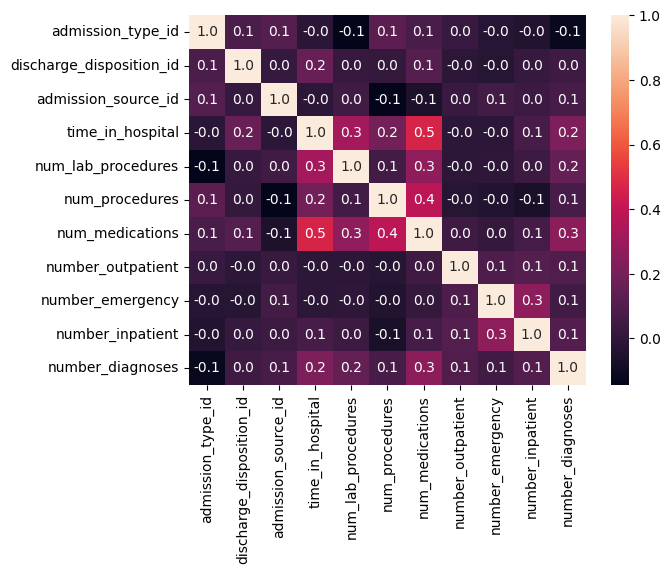

In [ ]:
import seaborn as sns
sns.heatmap(num_df.corr(), annot=True, fmt=".1f")

In [ ]:
#found high correlation between time_in_hospital and num_medications and removed time_in_hospital col
findf.drop('time_in_hospital', axis=1, inplace=True)

<ipython-input-43-c62f8ea2533c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findf.drop('time_in_hospital', axis=1, inplace=True)


In [ ]:
findf.head()

,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,metformin,race,repaglinide,glipizide,rosiglitazone,gender,acarbose,pioglitazone,glimepiride,readmitted
0,6,25,1,41,0,1,0,0,0,1,...,No,Caucasian,No,No,No,Female,No,No,No,NO
1,1,1,7,59,0,18,0,0,0,9,...,No,Caucasian,No,No,No,Female,No,No,No,>30
2,1,1,7,11,5,13,2,0,1,6,...,No,AfricanAmerican,No,Steady,No,Female,No,No,No,NO
3,1,1,7,44,1,16,0,0,0,7,...,No,Caucasian,No,No,No,Male,No,No,No,NO
4,1,1,7,51,0,8,0,0,0,5,...,No,Caucasian,No,Steady,No,Male,No,No,No,NO


In [ ]:
discrete_col_features = []
for col in cat_features:
    #print(col,':',findf[col].nunique())
    #print('/n')
    if findf[col].nunique() > 5:
        discrete_col_features.append(col)
print(discrete_col_features)

['medical_specialty_new', 'age']


In [ ]:
findf['age'].value_counts()

,count
age,
[70-80),26068
[60-70),22483
[50-60),17256
[80-90),17197
[40-50),9685
[30-40),3775
[90-100),2793
[20-30),1657
[10-20),691


In [ ]:
#applied frequency encoding for highly cardinal features
def frequency_encoding(df, column):
    freq = df[column].value_counts(normalize=True)
    df[f"{column}_encoded"] = df[column].map(freq)
    return df

# Example usage
# df = pd.DataFrame({'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A']})
for col in discrete_col_features:
    findf = frequency_encoding(findf, col)
findf.head()

<ipython-input-47-04d544c4b9c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column}_encoded"] = df[column].map(freq)
<ipython-input-47-04d544c4b9c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column}_encoded"] = df[column].map(freq)


,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,repaglinide,glipizide,rosiglitazone,gender,acarbose,pioglitazone,glimepiride,readmitted,medical_specialty_new_encoded,age_encoded
0,6,25,1,41,0,1,0,0,0,1,...,No,No,No,Female,No,No,No,NO,0.001562,0.001582
1,1,1,7,59,0,18,0,0,0,9,...,No,No,No,Female,No,No,No,>30,0.500894,0.006790
2,1,1,7,11,5,13,2,0,1,6,...,No,Steady,No,Female,No,No,No,NO,0.500894,0.016282
3,1,1,7,44,1,16,0,0,0,7,...,No,No,No,Male,No,No,No,NO,0.500894,0.037095
4,1,1,7,51,0,8,0,0,0,5,...,No,Steady,No,Male,No,No,No,NO,0.500894,0.095169


In [ ]:
findf.drop(discrete_col_features, axis=1, inplace=True)
findf.shape

<ipython-input-48-b0d8b51550da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  findf.drop(discrete_col_features, axis=1, inplace=True)


(101766, 25)

In [ ]:
cols

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'medical_specialty_new'],
      dtype='object')

In [ ]:
findf.dtypes

,0
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64
number_outpatient,int64
number_emergency,int64
number_inpatient,int64
number_diagnoses,int64


In [ ]:
readmitted = findf[['readmitted']]
findf = findf.drop('readmitted', axis=1)

In [ ]:
findf.head()

,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,race,repaglinide,glipizide,rosiglitazone,gender,acarbose,pioglitazone,glimepiride,medical_specialty_new_encoded,age_encoded
0,6,25,1,41,0,1,0,0,0,1,...,Caucasian,No,No,No,Female,No,No,No,0.001562,0.001582
1,1,1,7,59,0,18,0,0,0,9,...,Caucasian,No,No,No,Female,No,No,No,0.500894,0.006790
2,1,1,7,11,5,13,2,0,1,6,...,AfricanAmerican,No,Steady,No,Female,No,No,No,0.500894,0.016282
3,1,1,7,44,1,16,0,0,0,7,...,Caucasian,No,No,No,Male,No,No,No,0.500894,0.037095
4,1,1,7,51,0,8,0,0,0,5,...,Caucasian,No,Steady,No,Male,No,No,No,0.500894,0.095169


In [ ]:
cols=findf.columns
len(cols)

24

In [ ]:
cat_cols=[]
for col in cols:
    if findf[col].dtype=='object':
        if col!='readmitted':
            cat_cols.append(col)
print(cat_cols)

['insulin', 'diabetesMed', 'change', 'metformin', 'race', 'repaglinide', 'glipizide', 'rosiglitazone', 'gender', 'acarbose', 'pioglitazone', 'glimepiride']


In [ ]:
len(cat_cols)

12

In [ ]:
#applied onehot encoding on remaining categorical variables and removed dummy variables
encoded_df = pd.get_dummies(findf, columns=cat_cols, drop_first=True)
encoded_df = encoded_df.astype(int)
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   admission_type_id              101766 non-null  int64
 1   discharge_disposition_id       101766 non-null  int64
 2   admission_source_id            101766 non-null  int64
 3   num_lab_procedures             101766 non-null  int64
 4   num_procedures                 101766 non-null  int64
 5   num_medications                101766 non-null  int64
 6   number_outpatient              101766 non-null  int64
 7   number_emergency               101766 non-null  int64
 8   number_inpatient               101766 non-null  int64
 9   number_diagnoses               101766 non-null  int64
 10  medical_specialty_new_encoded  101766 non-null  int64
 11  age_encoded                    101766 non-null  int64
 12  insulin_No                     101766 non-null  int64
 13 

In [ ]:
encoded_df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,gender_Unknown/Invalid,acarbose_No,acarbose_Steady,acarbose_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up
0,6,25,1,41,0,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,1,1,7,59,0,18,0,0,0,9,...,0,1,0,0,1,0,0,1,0,0
2,1,1,7,11,5,13,2,0,1,6,...,0,1,0,0,1,0,0,1,0,0
3,1,1,7,44,1,16,0,0,0,7,...,0,1,0,0,1,0,0,1,0,0
4,1,1,7,51,0,8,0,0,0,5,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
readmitted.value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


In [ ]:
readmitted.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [ ]:
# Mapping target categories to integers
#encoding target variable
target_mapping = {'NO': 0, '>30': 1, '<30': 2}

# Apply the mapping to the 'Target' column
readmitted['readmitted'] = readmitted['readmitted'].map(target_mapping)
readmitted.head()

,readmitted
0,0
1,1
2,0
3,0
4,0


In [ ]:
readmitted.value_counts()

,count
readmitted,
0,54864
1,35545
2,11357


In [ ]:
train_df = pd.concat([encoded_df, readmitted], axis=1)
train_df.head()

,admission_type_id,discharge_disposition_id,admission_source_id,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,acarbose_No,acarbose_Steady,acarbose_Up,pioglitazone_No,pioglitazone_Steady,pioglitazone_Up,glimepiride_No,glimepiride_Steady,glimepiride_Up,readmitted
0,6,25,1,41,0,1,0,0,0,1,...,1,0,0,1,0,0,1,0,0,0
1,1,1,7,59,0,18,0,0,0,9,...,1,0,0,1,0,0,1,0,0,1
2,1,1,7,11,5,13,2,0,1,6,...,1,0,0,1,0,0,1,0,0,0
3,1,1,7,44,1,16,0,0,0,7,...,1,0,0,1,0,0,1,0,0,0
4,1,1,7,51,0,8,0,0,0,5,...,1,0,0,1,0,0,1,0,0,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   admission_type_id              101766 non-null  int64
 1   discharge_disposition_id       101766 non-null  int64
 2   admission_source_id            101766 non-null  int64
 3   num_lab_procedures             101766 non-null  int64
 4   num_procedures                 101766 non-null  int64
 5   num_medications                101766 non-null  int64
 6   number_outpatient              101766 non-null  int64
 7   number_emergency               101766 non-null  int64
 8   number_inpatient               101766 non-null  int64
 9   number_diagnoses               101766 non-null  int64
 10  medical_specialty_new_encoded  101766 non-null  int64
 11  age_encoded                    101766 non-null  int64
 12  insulin_No                     101766 non-null  int64
 13 

In [ ]:
train_df.dtypes

,0
admission_type_id,int64
discharge_disposition_id,int64
admission_source_id,int64
num_lab_procedures,int64
num_procedures,int64
num_medications,int64
number_outpatient,int64
number_emergency,int64
number_inpatient,int64
number_diagnoses,int64


In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
# Perform stratified train-test split
X = train_df.drop('readmitted', axis=1)  # Features
y = train_df['readmitted']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Display the splits
print("Training Set Proportions:")
print(y_train.value_counts(normalize=True))
print("\nTest Set Proportions:")
print(y_test.value_counts(normalize=True))

Training Set Proportions:
readmitted
0    0.539123
1    0.349276
2    0.111601
Name: proportion, dtype: float64

Test Set Proportions:
readmitted
0    0.539109
1    0.349296
2    0.111595
Name: proportion, dtype: float64


In [ ]:
# from sklearn.ensemble import VotingClassifier, RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define individual classifiers
# clf1 = LogisticRegression(random_state=42)
# clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
# clf3 = SVC(probability=True, random_state=42)  # Using probability=True for soft voting


# # Create a voting classifier (soft voting)
# voting_clf = VotingClassifier(estimators=[
#     ('lr', clf1),
#     ('rf', clf2),
#     ('svc', clf3)
# ], voting='soft')

# # Train the model
# voting_clf.fit(X_train, y_train)

# # Make predictions
# y_pred = voting_clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy of VotingClassifier: {accuracy:.2f}')

In [ ]:
#Random Forest Development
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=y_train.unique(), y=y_train)

# Create a dictionary of class weights
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

# Define RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200,max_depth=22,class_weight=class_weight_dict,random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of RandomForestClassifier: {accuracy:.2f}')

Accuracy of RandomForestClassifier: 0.56


In [ ]:
print("Computed Class Weights:", class_weight_dict)


Computed Class Weights: {0: 0.6182875493642321, 1: 0.9543560682180513, 2: 2.9868343815513625}


In [ ]:
# Generate classification report
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

def confusion_matrix_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['NO', '>30', '<30'], yticklabels=['NO', '>30', '<30'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

    print('/n')

    report = classification_report(y_test, y_pred, target_names=['NO', '>30', '<30'])
    print(report)

=== Random Forest ===


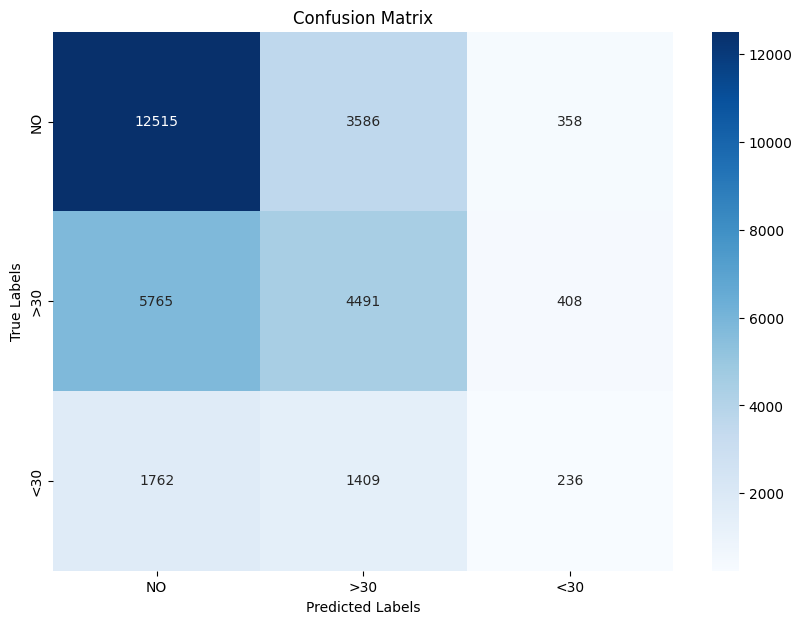

/n
              precision    recall  f1-score   support

          NO       0.62      0.76      0.69     16459
         >30       0.47      0.42      0.45     10664
         <30       0.24      0.07      0.11      3407

    accuracy                           0.56     30530
   macro avg       0.44      0.42      0.41     30530
weighted avg       0.53      0.56      0.54     30530



In [ ]:
print("=== Random Forest ===")
confusion_matrix_plot(y_test, y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
import xgboost as xgb

=== Logistic Regression ===


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.64      0.65      0.65     16459
           1       0.44      0.30      0.35     10664
           2       0.19      0.37      0.25      3407

    accuracy                           0.49     30530
   macro avg       0.42      0.44      0.42     30530
weighted avg       0.52      0.49      0.50     30530



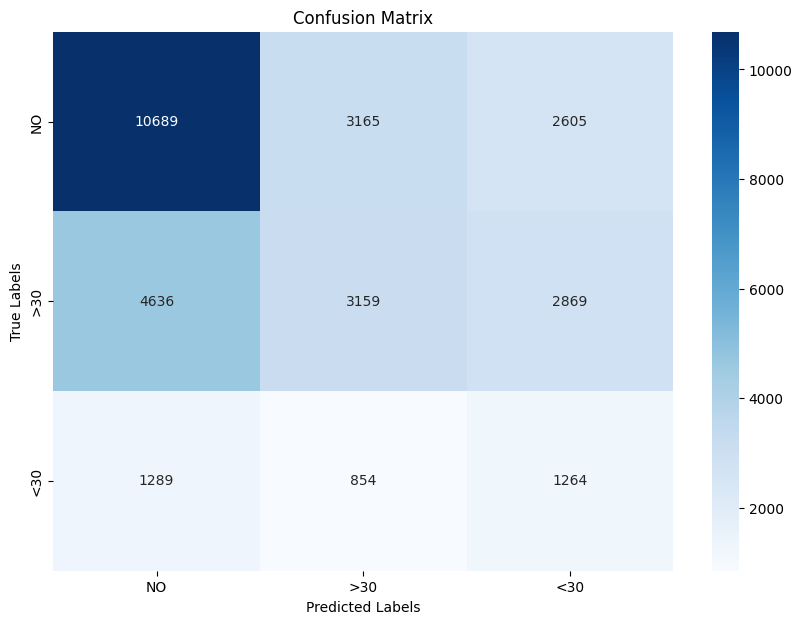

/n
              precision    recall  f1-score   support

          NO       0.64      0.65      0.65     16459
         >30       0.44      0.30      0.35     10664
         <30       0.19      0.37      0.25      3407

    accuracy                           0.49     30530
   macro avg       0.42      0.44      0.42     30530
weighted avg       0.52      0.49      0.50     30530



In [ ]:
# Logistic Regression
print("=== Logistic Regression ===")
lr_model = LogisticRegression(max_iter=500, class_weight=class_weight_dict,random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_pred_lr))
confusion_matrix_plot(y_test, y_pred_lr)


=== LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.078097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 388
[LightGBM] [Info] Number of data points in the train set: 71236, number of used features: 40
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

           0       0.68      0.60      0.64     16459
           1       0.47      0.39      0.43     10664
           2       0.20      0.42      0.27      3407

    accuracy                           0.51     30530
   macro avg       0.45      0.47      0.45     30530
weighted avg       0.55      0.51      0.52     30530



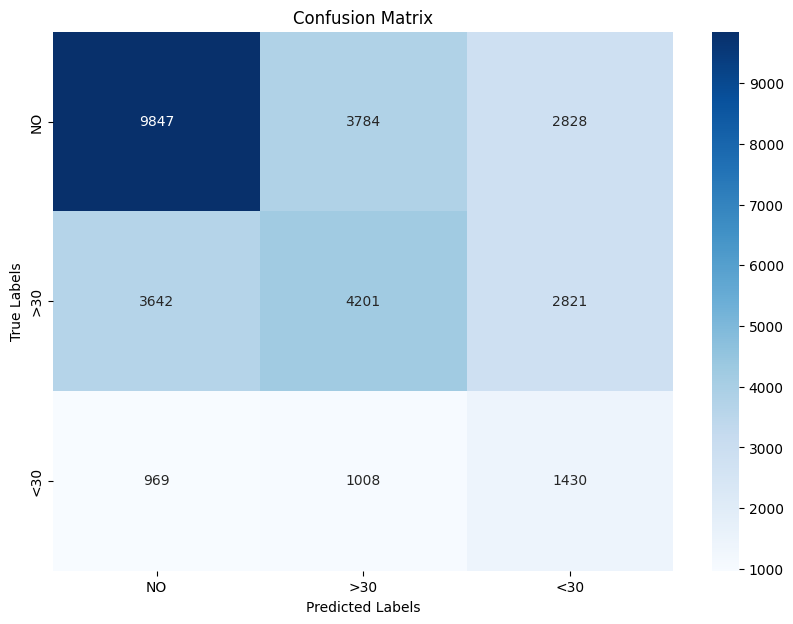

/n
              precision    recall  f1-score   support

          NO       0.68      0.60      0.64     16459
         >30       0.47      0.39      0.43     10664
         <30       0.20      0.42      0.27      3407

    accuracy                           0.51     30530
   macro avg       0.45      0.47      0.45     30530
weighted avg       0.55      0.51      0.52     30530



In [ ]:
# LightGBM
print("\n=== LightGBM ===")
import numpy as np
sample_weights = y_train.map(class_weight_dict)

train_data = lgb.Dataset(X_train, label=y_train, weight=sample_weights)

params = {
    'objective': 'multiclass',
    'num_class': len(np.unique(y_train)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'max_depth': 20,
    'num_leaves': 30,
    'random_state': 42
}

lgb_model = lgb.train(params, train_data, num_boost_round=100)

y_pred_lgb = lgb_model.predict(X_test)
y_pred_labels = y_pred_lgb.argmax(axis=1)
print(classification_report(y_test, y_pred_labels))
confusion_matrix_plot(y_test, y_pred_labels)


=== XGBoost ===


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.62      0.68      0.65     16459
           1       0.44      0.45      0.44     10664
           2       0.23      0.12      0.16      3407

    accuracy                           0.54     30530
   macro avg       0.43      0.42      0.42     30530
weighted avg       0.52      0.54      0.52     30530



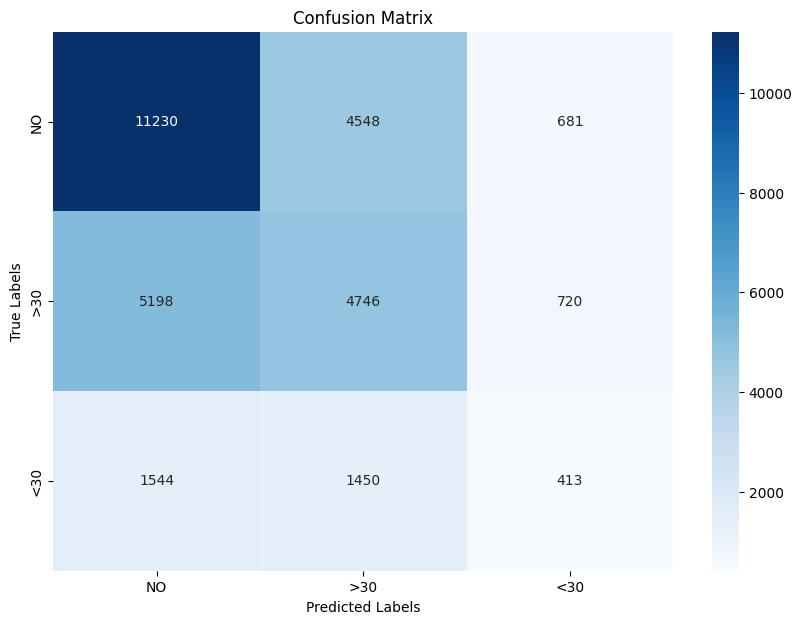

/n
              precision    recall  f1-score   support

          NO       0.62      0.68      0.65     16459
         >30       0.44      0.45      0.44     10664
         <30       0.23      0.12      0.16      3407

    accuracy                           0.54     30530
   macro avg       0.43      0.42      0.42     30530
weighted avg       0.52      0.54      0.52     30530



In [ ]:
# XGBoost
print("\n=== XGBoost ===")
sample_weights = y_train.map(class_weight_dict)
xgb_model = xgb.XGBClassifier(objective='multi:softmax',n_estimators=250,max_depth=25,learning_rate=0.05,use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train,sample_weight=sample_weights)
y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))
confusion_matrix_plot(y_test, y_pred_xgb)

Epoch [1/50], Loss: 1.0676
Epoch [2/50], Loss: 1.0600
Epoch [3/50], Loss: 1.0586
Epoch [4/50], Loss: 1.0560
Epoch [5/50], Loss: 1.0512
Epoch [6/50], Loss: 1.0492
Epoch [7/50], Loss: 1.0474
Epoch [8/50], Loss: 1.0466
Epoch [9/50], Loss: 1.0459
Epoch [10/50], Loss: 1.0451
Epoch [11/50], Loss: 1.0443
Epoch [12/50], Loss: 1.0434
Epoch [13/50], Loss: 1.0425
Epoch [14/50], Loss: 1.0428
Epoch [15/50], Loss: 1.0425
Epoch [16/50], Loss: 1.0412
Epoch [17/50], Loss: 1.0399
Epoch [18/50], Loss: 1.0411
Epoch [19/50], Loss: 1.0398
Epoch [20/50], Loss: 1.0394
Epoch [21/50], Loss: 1.0389
Epoch [22/50], Loss: 1.0380
Epoch [23/50], Loss: 1.0379
Epoch [24/50], Loss: 1.0370
Epoch [25/50], Loss: 1.0361
Epoch [26/50], Loss: 1.0360
Epoch [27/50], Loss: 1.0350
Epoch [28/50], Loss: 1.0347
Epoch [29/50], Loss: 1.0346
Epoch [30/50], Loss: 1.0331
Epoch [31/50], Loss: 1.0335
Epoch [32/50], Loss: 1.0340
Epoch [33/50], Loss: 1.0325
Epoch [34/50], Loss: 1.0313
Epoch [35/50], Loss: 1.0327
Epoch [36/50], Loss: 1.0288
E

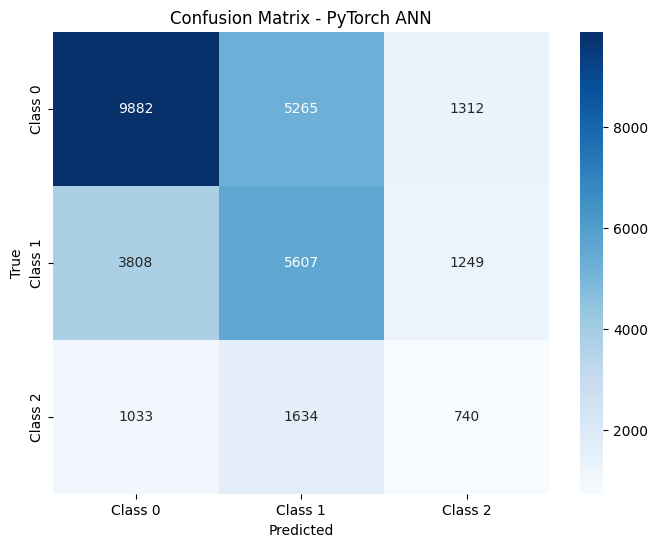

In [ ]:
#Artificial Neural Network(ANN)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Assuming you have `X_train`, `X_test`, `y_train`, and `y_test` already prepared
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Create DataLoader for PyTorch
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the ANN model
class ANNModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(ANNModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)  # First hidden layer
        self.fc2 = nn.Linear(256, 128)         # Second hidden layer
        self.fc3 = nn.Linear(128, 64)         # Second hidden layer
        self.fc4 = nn.Linear(64, output_size) # Output layer
        self.elu = nn.ELU()                 # Activation function
        self.softmax = nn.Softmax(dim=1)      # Softmax for multi-class output

    def forward(self, x):
        x = self.elu(self.fc1(x))
        x = self.elu(self.fc2(x))
        x = self.elu(self.fc3(x))
        x = self.fc4(x)
        return self.softmax(x)

# Model instantiation
input_size = X_train.shape[1]  # Number of features
output_size = len(y_train.unique())  # Number of classes
model = ANNModel(input_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()               # Zero gradients
        outputs = model(X_batch)            # Forward pass
        loss = criterion(outputs, y_batch) # Compute loss
        loss.backward()                     # Backward pass
        optimizer.step()                    # Update weights
        epoch_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        y_pred.extend(predicted.numpy())
        y_true.extend(y_batch.numpy())

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title("Confusion Matrix - PyTorch ANN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
